Evaluating large language models' language competency, specifically its ability to predict the definition of Danish metaphorical expressions and figures of speech; a figure of speech in which a word or phrase literally denoting one kind of object or idea is used in place of another to suggest a likeness or analogy between them.

Dansk Sprog- og Litteraturselskab (DSL) has in collaboration with Digitaliseringsstyrelsen created the dataset under a CC-BY-4.0 license. The dataset is intended to be used for evaluating large language models' (LLMs) ability to understand Danish metaphorical expressions and figures of speech. All credit goes to DSL. You can download and read more about the dataset, which has been made available on sprogteknologi.dk, here: https://sprogteknologi.dk/blog/nyt-datasaet-til-evaluering-af-sprogmodellers-evne-til-at-forsta-danske-talemader-og-faste-udtryk

This project is an evaluation of six different LLMs: GPT-3.5, GPT-4, GPT-4o, Claude, Gemini, and Llama.

GPT-3 from 2020, (if you can call four years 'old'!) and GPT-3.5, an improved version of the model was published in 2023. Since GPT-3.5 is the the smallest and oldest model, it is intended to be used as a baseline ot be able to see how much progress has been made in LLM capability. But, as you will see below, the results may surprise!


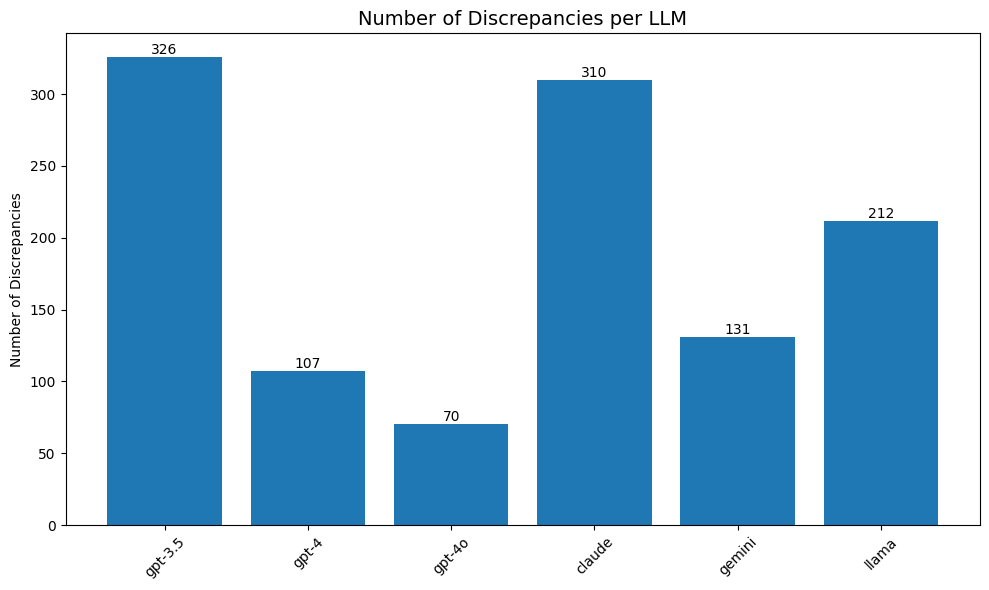

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Get root directory
root_dir = Path(os.getcwd()).parent

# Order of LLMs
llm_order = ['gpt-3.5', 'gpt-4', 'gpt-4o', 'claude', 'gemini', 'llama']

# Get discrepancy counts
discrepancy_counts = []
for llm in llm_order:
    file_path = root_dir / 'data' / 'processed' / f'only_discrepancies_{llm}.csv'
    df = pd.read_csv(file_path)
    discrepancy_counts.append(len(df))

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(llm_order, discrepancy_counts)

# Customize plot
plt.title('Number of Discrepancies per LLM', fontsize=14)
plt.ylabel('Number of Discrepancies')
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

Let's have a look at the accuracy of the LLMs.

Interestingly, Claude's Sonnet 3.5 performs almost as poorly as the older GPT-3.5.

Perhaps unsurprisingly, the accuracy of the progressively bigger, newer and better GPT models improves. 

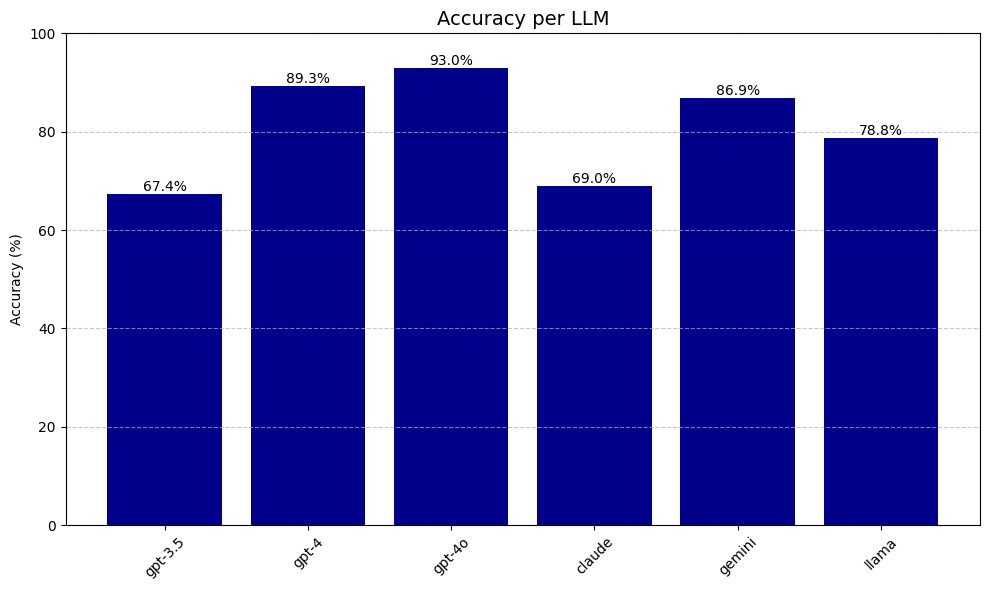

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Get root directory
root_dir = Path(os.getcwd()).parent

# Order of LLMs
llm_order = ['gpt-3.5', 'gpt-4', 'gpt-4o', 'claude', 'gemini', 'llama']

# Calculate accuracies
accuracies = []
for llm in llm_order:
    file_path = root_dir / 'data' / 'processed' / f'only_discrepancies_{llm}.csv'
    df = pd.read_csv(file_path)
    n_discrepancies = len(df)
    accuracy = (1000 - n_discrepancies) / 1000  # Calculate accuracy
    accuracies.append(accuracy * 100)  # Convert to percentage

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(llm_order, accuracies, color='darkblue')

# Customize plot
plt.title('Accuracy per LLM', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Set y-axis limits to emphasize differences
plt.ylim(0, 100)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

GPT-4o achives an accuracy of 93%! I think that's very impressive, and I doubt a average Danish-speaker will be able to achieve that level of accuracy.

So, is there any rhyme and reason to the types of misinterpretations the LLMs generally make? That's what we will look at in the section below

Let's take a look at the types of misinterpretations.

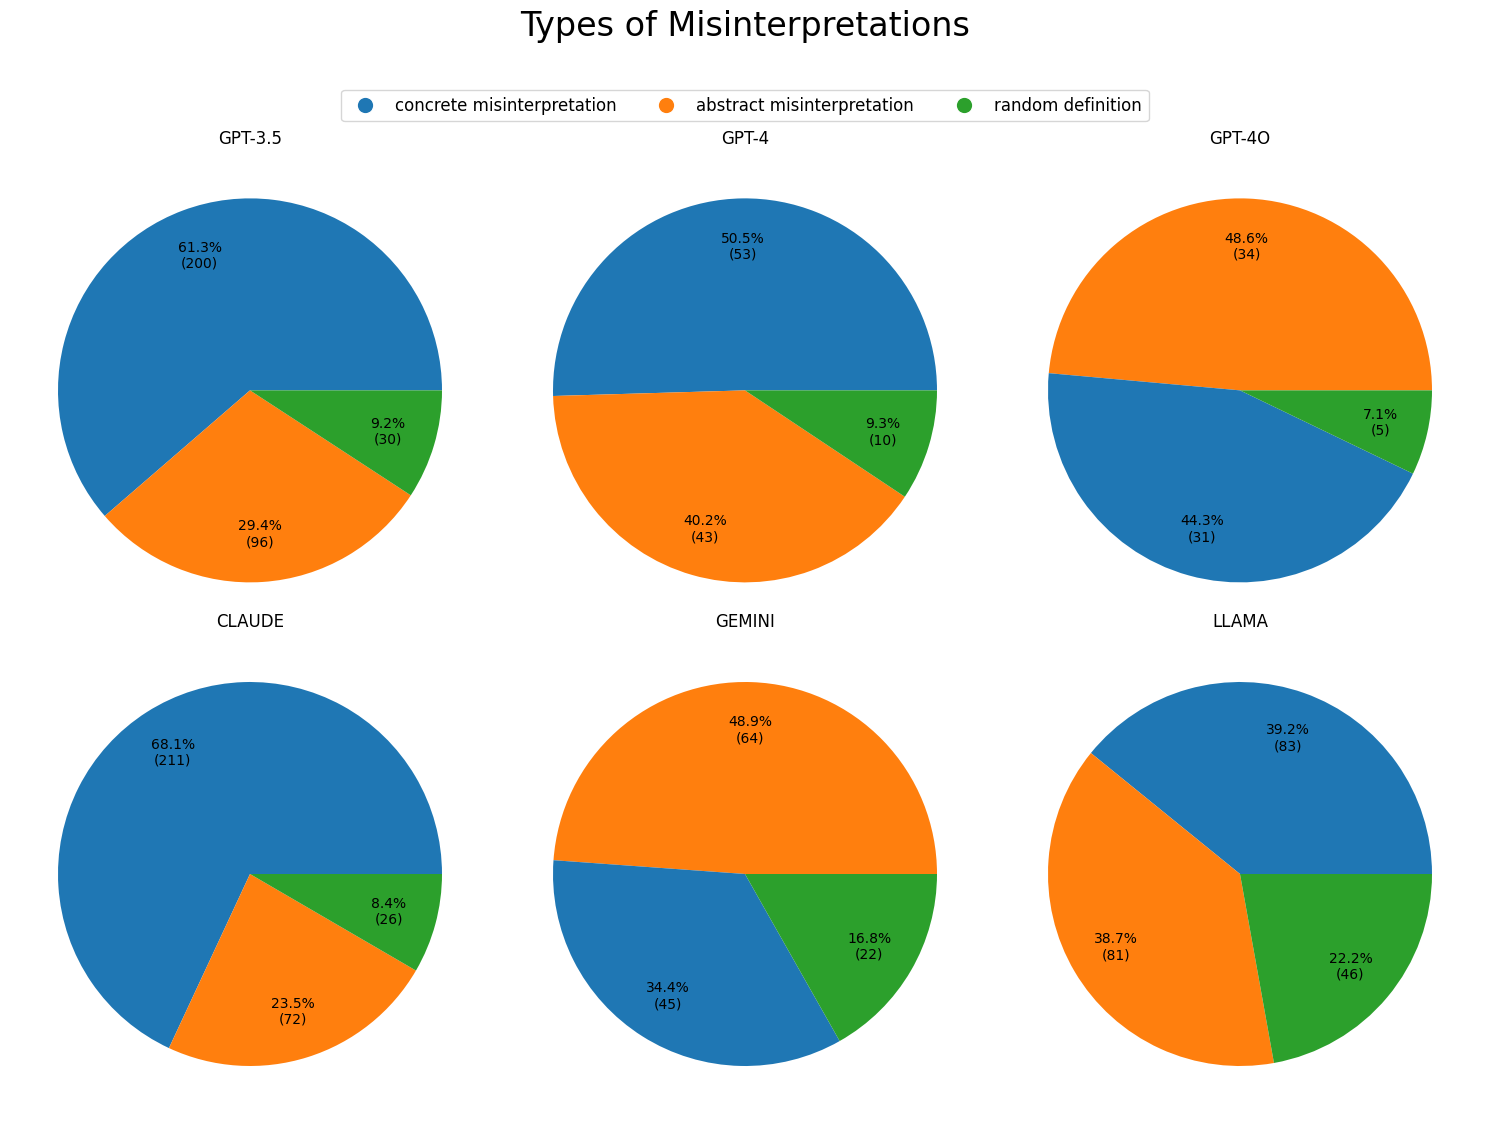

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Get the root directory (where notebooks folder is)
root_dir = Path(os.getcwd()).parent

# Set figure size
fig = plt.figure(figsize=(15, 12))

# Define color mapping
colors = {
   'concrete misinterpretation': '#1f77b4',  # blue
   'abstract misinterpretation': '#ff7f0e',  # orange
   'random definition': '#2ca02c'            # green
}

# Add main title and legend with larger font
plt.suptitle('Types of Misinterpretations', fontsize=24, y=0.95)  # Increased font size by 50%

# Add legend manually with larger font
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=color, markersize=12, label=label)
                 for label, color in colors.items()]
fig.legend(handles=legend_elements, loc='upper center', 
         bbox_to_anchor=(0.5, 0.89), ncol=3, fontsize=12)

# Order of LLMs with gpt-3.5 first
llm_order = ['gpt-3.5', 'gpt-4', 'gpt-4o', 'claude', 'gemini', 'llama']

# Create 2x3 grid
for idx, llm in enumerate(llm_order, 1):
   # Construct full path
   file_path = root_dir / 'results' / 'predictions' / f'misinterpretations_{llm}.csv'
   
   # Read data
   df = pd.read_csv(file_path)
   
   # Count misinterpretation types
   counts = df['misinterpretation_type'].value_counts()
   
   # Create subplot
   ax = plt.subplot(2, 3, idx)
   
   # Create pie chart with both percentage and absolute numbers
   plt.pie(counts.values, 
           colors=[colors[key] for key in counts.index],
           autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(counts.values)):d})',
           labels=[''] * len(counts),
           pctdistance=0.75,  # Move percentage labels more toward center
           textprops={'ha': 'center', 'va': 'center'})  # Center align text
   
   # Use original model name for display, position title closer to chart
   display_name = 'GPT-3.5' if llm == 'gpt-3.5' else llm.upper()
   ax.set_title(display_name, pad=5, fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Make room for title and legend
plt.show()

Even though they do not correctly predict the label, the prevalence of the LLMS to pick (random definitions is picked under 10% of the time by 4/6 of the models) is a sign that a sign of some sort language competency - even though it does not correctly predict the label.

The amount of wrong predictions rose from 327=>347 when introdced one-shot prompting (from previous zero-shot) for GPT-3. I only introduced the second part of the below prompt, but this introduced more errors. So, giving the GPT-3 model an example actually made it worse at predicting the correct label. My immediate guess as to why is that since the meaning in metaphorical expressions is indirect, by adding this second part of the prompt, it introduced a flair of context to the response - and not just described the process, which was the goal - thereby introducing some noise to the model's predictions.


        prompt = (
            "Choose the correct definition for the given metaphorical expression by responding with only "
            "a single letter representing your choice (A, B, C, or D).\n"
            f"Sentence: {expression}\n"
            f"Option A: {options['A']}\n"
            f"Option B: {options['B']}\n"
            f"Option C: {options['C']}\n"
            f"Option D: {options['D']}\n"
            "Your response should be exactly one letter: A, B, C, or D."

            "For example,\n"
            "Sentence: lægge låg på noget\n"	
            "Option A: lægge mærke til og huske på\n"
            "Option B: afslutte, skjule eller lægge en dæmper på noget\n"	
            "Option C: ikke anerkende og give plads til negative følelser\n"	
            "Option D: lægge et låg på noget\n"
            "Prediction: B"
        )